# 설문결과 대시보드로 시각화 하기

## 데이터 불러오기

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
matplotlib.rcParams['font.family'] = 'AppleGothic' # 리눅스 돋움체 설정
matplotlib.rcParams['font.size'] = 15 # 폰트 크기
matplotlib.rcParams['axes.unicode_minus'] = False  # - 마이너스 글꼴 오류 처리

In [3]:
df = pd.read_csv("data.csv")
df = df.dropna(subset=['학년'])
df.head()

,시간,참관여부,학년,반,만족도,학부모 의견
0,2022. 4. 13 오후 12:12:54,"네, 참관하였습니다.",2학년,4반,4.0,NaN
1,2022. 4. 13 오후 12:13:04,"네, 참관하였습니다.",5학년,4반,4.0,NaN
2,2022. 4. 13 오후 12:13:05,"네, 참관하였습니다.",5학년,4반,4.0,NaN
3,2022. 4. 13 오후 12:13:05,"네, 참관하였습니다.",1학년,5반,3.0,NaN
4,2022. 4. 13 오후 12:13:09,"네, 참관하였습니다.",4학년,2반,3.0,NaN


In [79]:
# 칼럼에서 학년, 반 없애기
df['학년'] = df['학년'].map(lambda x: x[0])
df['반'] = df['반'].map(lambda x: x[0])

## 학급별 응답현황 - groupby

  학년       만족도
0  1  3.480000
1  2  3.676471
2  3  3.419355
3  4  3.511628
4  5  3.428571
5  6  3.619048


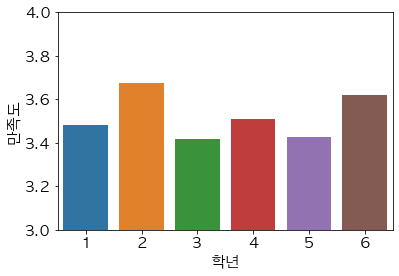

In [89]:
# 학년별 만족도 평균
grouped_test = df.groupby("학년").mean()
grouped_test = grouped_test.reset_index()
print(grouped_test)

# 그래프로 나타내기
sns.barplot(x=grouped_test.columns[0],
           y=grouped_test.columns[1],
            data=grouped_test,
           )
plt.ylim(3,4)
plt.show()

In [18]:
# 칼럼 숫자로 그룹짓기
grouped_grade = df.groupby(df.columns[2]).mean()

In [20]:
list(grouped_grade.index)

['1학년', '2학년', '3학년', '4학년', '5학년', '6학년']

In [95]:
# 학급별 만족도
grouped_classes = df.groupby(["학년", "반"]).mean()
grouped_classes = grouped_classes.reset_index()
grouped_classes['학급'] = grouped_classes['학년'] + grouped_classes['반']
print(grouped_classes)

   학년  반       만족도  학급
0   1  1  3.125000  11
1   1  2  3.571429  12
2   1  3  3.500000  13
3   1  4  3.777778  14
4   1  5  3.428571  15
5   2  1  4.000000  21
6   2  2  3.800000  22
7   2  3  3.400000  23
8   2  4  3.625000  24
9   3  1  2.333333  31
10  3  2  4.000000  32
11  3  3  3.818182  33
12  3  4  3.222222  34
13  3  5  2.666667  35
14  4  1  4.000000  41
15  4  2  3.600000  42
16  4  3  3.000000  43
17  4  4  3.625000  44
18  4  5  3.750000  45
19  4  6  3.300000  46
20  5  1  3.375000  51
21  5  2  2.000000  52
22  5  3  4.000000  53
23  5  4  3.500000  54
24  5  5  3.714286  55
25  5  도  4.000000  5도
26  6  1  3.666667  61
27  6  2  3.750000  62
28  6  3  3.714286  63
29  6  4  4.000000  64
30  6  5  3.333333  65


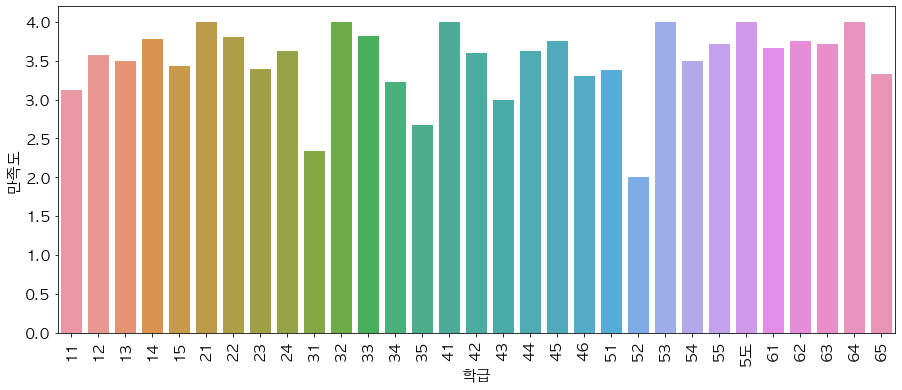

In [108]:
# 그래프로 나타내기
plt.figure(figsize=(15,6))
sns.barplot(x=grouped_classes.columns[3],
           y=grouped_classes.columns[2],
            data=grouped_classes,
           )
plt.ylim(0,4.2)
plt.xticks(rotation=90)
plt.show()

In [21]:
# 학년별 응답현황 카운트
df.groupby(["학년"]).size().reset_index(name="응답수")

,학년,응답수
0,1학년,50
1,2학년,34
2,3학년,31
3,4학년,43
4,5학년,28
5,6학년,21


In [22]:
# 학년별 응답현황 카운트
df.groupby(["학년",'반']).size().reset_index(name="응답수")

,학년,반,응답수
0,1학년,1반,8
1,1학년,2반,7
2,1학년,3반,12
3,1학년,4반,9
4,1학년,5반,14
5,2학년,1반,6
6,2학년,2반,10
7,2학년,3반,10
8,2학년,4반,8
9,3학년,1반,3


## 워드클라우드 변환

In [7]:
df_wordcloud = df.dropna(subset=['학부모 의견'])
df_wordcloud.head()

,시간,참관여부,학년,반,만족도,학부모 의견
12,2022. 4. 13 오후 12:13:22,"네, 참관하였습니다.",3학년,2반,4.0,고생하셨습니다
16,2022. 4. 13 오후 12:13:36,"네, 참관하였습니다.",6학년,2반,3.0,수고하셨습니다~~
17,2022. 4. 13 오후 12:13:36,"네, 참관하였습니다.",3학년,4반,4.0,고생하셨습니다
19,2022. 4. 13 오후 12:13:49,"네, 참관하였습니다.",4학년,2반,3.0,소리가 잘 안들렸지만 열심히 하는 모습이 보기 좋았습니다
21,2022. 4. 13 오후 12:13:53,"네, 참관하였습니다.",2학년,2반,4.0,아이들이랑 선생님이랑 참여도 아주 좋아보였습니다


In [10]:
lst_lines = list(df_wordcloud['학부모 의견'])
lst_lines[:5]

['고생하셨습니다',
 '수고하셨습니다~~',
 '고생하셨습니다',
 '소리가 잘 안들렸지만 열심히 하는 모습이 보기 좋았습니다',
 '아이들이랑 선생님이랑 참여도 아주 좋아보였습니다']

In [14]:
lines = " ".join(lst_lines) #학부모 의견 말뭉치 생성 리스트 → 텍스트

In [15]:
# 말뭉치 처리 라이브러리 설치
from konlpy.tag import Okt
from collections import Counter

In [16]:
okt = Okt()

In [18]:
line = okt.pos(lines)